These are some Pandas tricks I use frequently; I hope it's just as useful to you too!

Update: we'll now use `iris` for this (thanks Sam!):

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(
    data = iris['data'],
    columns = iris['feature_names']
)
df['species'] = iris['target_names'][iris['target']]
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


## Visual aids

### TQDM
I absolutely love TQDM, partly because of how much I end up coding in `IPython` or a Jupyter environment.
It's always helpful to know how far along I've gone along in applying some function:

In [2]:
from tqdm import tqdm
tqdm.pandas()

def foo(z: float) -> bool:
    """
    A pretty meaningless function
    """
    if z >= 5:
        return 1
    else:
        return 0

# foo is a function to apply on a value of the column
df['sepal length (cm)'].progress_apply(lambda z: foo(z)) # watch magic happen!

100%|██████████| 150/150 [00:00<00:00, 81930.67it/s]


0      1
1      0
2      0
3      0
4      1
      ..
145    1
146    1
147    1
148    1
149    1
Name: sepal length (cm), Length: 150, dtype: int64

### Plotting!
I don't think I take advantage of this feature enough, partly because libraries like Seaborn, plotly, plotnine
and Altair all work natively with `Dataframe` objects. But if you just want something quick, these go a long
way, too:

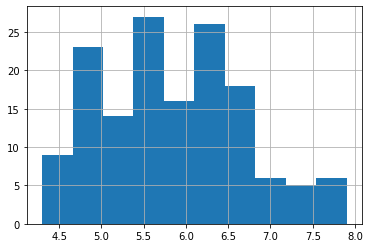

In [3]:
_ = df['sepal length (cm)'].hist()

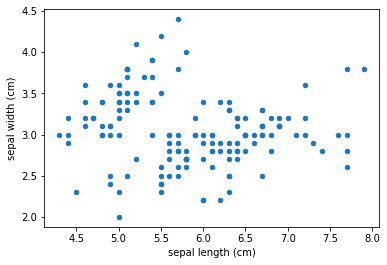

In [4]:
_ = df.plot(x = 'sepal length (cm)', y = 'sepal width (cm)', kind = 'scatter')

## Column manipulation

### Strings as aggregation functions
There's loads of these, e.g. `std`, `mean`, `first`, etc... 

In [5]:
df.groupby("species").agg({
    "petal length (cm)": "mean",
    "petal width (cm)": "std"
})

,petal length (cm),petal width (cm)
species,,
setosa,1.462,0.105386
versicolor,4.260,0.197753
virginica,5.552,0.274650


### Getting unique values
Gone are the days of using something like `set(df["column"])`; behold, `unique` and `nunique` are your friend!

In [6]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
df['species'].nunique()

3

In [8]:
# this also works
df[df['sepal length (cm)'] > 6].agg(
    {
        "species": "unique"
    }
)

species    [versicolor, virginica]
dtype: object

## Slightly more efficient CSV reading/handling

### Only getting some columns
This is a three-stage process, but it saves memory, and leads to faster reading too, which is a bonus! Notice how, without this, it can be a big TSV to read:

In [9]:
PATH = "../gene_exp/E-MTAB-5214-query-results.tpms.tsv"
gtex = pd.read_csv(PATH, comment='#', sep='\t')
gtex

,Gene ID,Gene Name,Brodmann (1909) area 24,Brodmann (1909) area 9,C1 segment of cervical spinal cord,EBV-transformed lymphocyte,adrenal gland,amygdala,aorta,atrium auricular region,...,suprapubic skin,testis,thyroid gland,tibial artery,tibial nerve,transformed skin fibroblast,transverse colon,urinary bladder,uterus,vagina
0,ENSG00000000003,TSPAN6,6.0,5.0,7.0,0.3,17.0,7.0,11.0,5.0,...,10.0,70.0,22.0,9.0,35.0,20.0,38.0,16.0,33.0,31.0
1,ENSG00000000005,TNMD,0.2,0.2,NaN,NaN,NaN,0.1,0.2,0.1,...,2.0,0.3,0.3,0.8,4.0,NaN,0.8,0.2,0.4,0.2
2,ENSG00000000419,DPM1,26.0,35.0,30.0,119.0,64.0,18.0,79.0,37.0,...,60.0,91.0,74.0,78.0,76.0,105.0,50.0,61.0,85.0,71.0
3,ENSG00000000457,SCYL3,2.0,3.0,3.0,12.0,5.0,2.0,6.0,2.0,...,8.0,8.0,10.0,7.0,10.0,6.0,7.0,11.0,10.0,9.0
4,ENSG00000000460,C1orf112,0.5,0.7,2.0,12.0,1.0,0.6,2.0,0.8,...,2.0,10.0,3.0,2.0,5.0,2.0,2.0,3.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46706,ENSG00000281909,HERC2P7,NaN,NaN,0.1,NaN,0.1,NaN,NaN,NaN,...,NaN,0.2,0.2,NaN,0.1,0.1,NaN,NaN,NaN,NaN
46707,ENSG00000281910,SNORA50A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.7,NaN,0.3,0.3,0.5,NaN,NaN,0.3,0.4,0.5
46708,ENSG00000281912,LINC01144,1.0,1.0,2.0,2.0,2.0,1.0,1.0,0.4,...,2.0,4.0,5.0,1.0,3.0,2.0,1.0,2.0,2.0,2.0
46709,ENSG00000281918,ENSG00000281918,0.1,0.1,0.2,NaN,NaN,0.2,NaN,NaN,...,0.1,0.2,0.1,NaN,NaN,NaN,0.1,NaN,0.1,NaN


Let's do this a bit better:

In [10]:
def get_col(column_name: str) -> bool:
    """
    Simple function to filter column names
    """
    if "gene" in column_name.lower() or "blood" in column_name.lower():
        return True
    else:
        return False


# Get the header by reading the first line
header = pd.read_csv(PATH, nrows = 1, sep='\t', comment='#').columns

# Filter the columns of interest
usecols = [c for c in header if get_col(c)]

# now read it
gtex = pd.read_csv(PATH, usecols = usecols, comment='#', sep = '\t') 
gtex

,Gene ID,Gene Name,blood
0,ENSG00000000003,TSPAN6,0.2
1,ENSG00000000005,TNMD,NaN
2,ENSG00000000419,DPM1,14.0
3,ENSG00000000457,SCYL3,3.0
4,ENSG00000000460,C1orf112,0.8
...,...,...,...
46706,ENSG00000281909,HERC2P7,NaN
46707,ENSG00000281910,SNORA50A,NaN
46708,ENSG00000281912,LINC01144,0.2
46709,ENSG00000281918,ENSG00000281918,NaN


### Chunkifying data
I have to credit my old colleague Magda for this trick:

In [11]:
import re
pattern = re.compile(r"^IL1[A-Z]$")

def filter_interleukin1(chunk):
    """
    Apply a regex to filter out chunks
    """
    return chunk[
        chunk['Gene Name'].apply(lambda z: True if pattern.findall(z) else False)
    ]


gtex = pd.concat(
    [filter_interleukin1(chunk) for chunk in pd.read_csv("../gene_exp/E-MTAB-5214-query-results.tpms.tsv", 
                                    sep='\t', comment = '#',
                                    iterator=True, chunksize=1000)]
)
gtex

,Gene ID,Gene Name,Brodmann (1909) area 24,Brodmann (1909) area 9,C1 segment of cervical spinal cord,EBV-transformed lymphocyte,adrenal gland,amygdala,aorta,atrium auricular region,...,suprapubic skin,testis,thyroid gland,tibial artery,tibial nerve,transformed skin fibroblast,transverse colon,urinary bladder,uterus,vagina
4338,ENSG00000115008,IL1A,0.2,0.2,1.0,9.0,NaN,0.2,NaN,NaN,...,1.0,19.0,0.1,NaN,0.1,0.2,0.1,1.0,NaN,0.4
5652,ENSG00000125538,IL1B,0.4,0.5,3.0,3.0,0.7,0.8,1.0,0.3,...,0.4,1.0,0.5,0.3,0.5,0.4,1.0,0.9,0.2,0.5


### Memory efficiency
This is not what I do immediately, but I find that it sometimes has benefits, especially when memory is a
bit precious and I have to make ends meet:

```python
pd.to_numeric(df['numeric_column'], downcast='unsigned') # only really works for positive integers
pd.to_numeric(df['numeric_column'], downcast='Sparse[int]') # more effective with lots of 0s
df['column'].astype(bool) # is your data full of 0s and 1s...?
```


## SQL(?) for Pandas
Yes, you can call SQL via Pandas, e.g.
```python
conn = sqlite3.connect() # or a sqlalchemy connection... etc.
pd.read_sql("""SELECT * FROM ... """, con = conn)
```

but you can also write string queries for your Pandas data! Let's look at `iris` again:

In [12]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
# you may know this as df[df['species'] == 'setosa']
df.query("species == 'setosa'").head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


I find this is slightly more readable, especially when there's lots of conditions, such as:

In [14]:
# you may know this as df[(df['species'] == 'setosa')&(df['sepal width (cm)'] < 3.2)]
df.query("species == 'setosa' and `sepal width (cm)` < 3.2").head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
1,4.9,3.0,1.4,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa
12,4.8,3.0,1.4,0.1,setosa
13,4.3,3.0,1.1,0.1,setosa
25,5.0,3.0,1.6,0.2,setosa
30,4.8,3.1,1.6,0.2,setosa
34,4.9,3.1,1.5,0.2,setosa
38,4.4,3.0,1.3,0.2,setosa


## Serialisation
While TSV/CSV is the go-to format for many, I've found that working with them can be a bit of a pain,
especially when my files get big. Some formats I've played with lately are Apache's `feather` and `Parquet`
formats. 

While they sometimes don't offer as much compression as the humble `gzip`, they're still much
better at reading; remember to have `pyarrow` installed!

```python
df.to_parquet()
pd.read_parquet()
```  

Next time I'll cover `numba`, which has been one of the most exciting things I've worked with lately.